<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/obsGW/Chapter4Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with estimating probabilities and using Bayes Theorem within a Jupyter notebook.  The questions coloured green are important practice for CA.

Before attempting these examples, please ensure you have read through [Chapter 4 Jupyter Notebook](https://github.com/haleygomez/Data-Science-2024/blob/main/blended_exercises/Chapter4/Chapter4.ipynb) and have completed the Learning Central **Chapter 4 quiz**.

These are good practice for CA 1 Question 5.

***

# Errors

## Question

Three students measure the same resistance several times, with final measurements (in Ohms):

Student 1: $R = 11 \pm 1$
Student 2: $R = 12 \pm 1$
Student 3: $R = 10 \pm 3$.

Given these three results what do we write down as the best estimate for the resistance $R$? Tip: you will need to use weighted errors.

### Answer

*Your answer here.*

In [ ]:
import numpy as np

#defining R and standard dev
R = [11, 12, 10]
std = [1, 1, 3]

#weighted errors
weight = 1/np.array(std)**2
best_r = np.sum(weight*R)/np.sum(weight)
uncert_r = np.sqrt(1/np.sum(weight))

print('The resistance is {:.1f} +/- {:.1f} Ohms'.format(best_r, uncert_r))

The resistance is 11.4 +/- 0.7 Ohms


***

# Correlation

## <font color=#30a64d>Question </font>

The datafile [worldpopulation.txt](https://github.com/haleygomez/Data-Science-2024/raw/main/blended_exercises/Chapter4/worldpopulation.txt) contains the world population size measured since 1960. Plot the data (you will need to upload the datafile to your Google Colab). <br><br>

Measure the correlation coefficient using the in built Python package for the Pearson $r$s statistic. <br><br>

Measure it again but this time creating the functions to calculate $r$ from scratch.  

The url of the file is "https://github.com/haleygomez/Data-Science-2024/raw/main/blended_exercises/Chapter4/worldpopulation.txt"

### Answer

*Your answer here.*

Text(0, 0.5, 'Population')

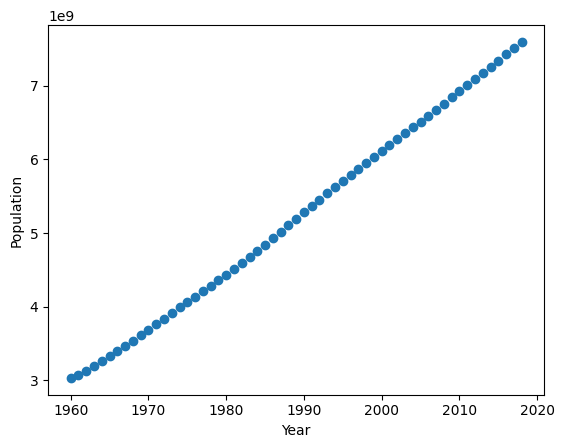

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#Loading in text file and plotting
data = np.loadtxt('https://github.com/haleygomez/Data-Science-2024/raw/main/blended_exercises/Chapter4/worldpopulation.txt')
plt.plot(data[0], data[1], 'o')
plt.xlabel('Year')
plt.ylabel('Population')

In [ ]:
from scipy.stats import pearsonr

#calculating r using in built python function
corr, _ = pearsonr(data[0], data[1])
print('The correlation coefficient is {:.5f}'.format(corr))

The correlation coefficient is 0.99956


In [ ]:
#calculating r by hand
#how many data points?
n = len(data[0])

#calculate mean and standard dev
mean_n = np.mean(data[1])
std_n = np.sqrt(np.sum((data[1]-mean_n)**2)/(n-1))

mean_yr = np.mean(data[0])
std_yr = np.sqrt(np.sum((data[0]-mean_yr)**2)/(n-1))

print('Average number is {:.2e} +/- {:.2e}'.format(mean_n, std_n))
print('Average year is {:.2e} +/- {:.2e}'.format(mean_yr, std_yr))

#calculate correlation coeff
sum_xy = np.sum((data[1]-mean_n)*(data[0]-mean_yr))
sum_x = np.sum((data[0]-mean_yr)**2)
sum_y = np.sum((data[1]-mean_n)**2)

r = sum_xy/np.sqrt(sum_x*sum_y)
print('The correlation coefficient between the two is {:.5f}'.format(r))
print('This indicates a very strong positive correlation in the data')

Average number is 5.22e+09 +/- 1.38e+09
Average year is 1.99e+03 +/- 1.72e+01
The correlation coefficient between the two is 0.99956
This indicates a very strong positive correlation in the data


***

# Hypothesis Testing

## <font color=#30a64d>Question</font>

A company releases a new ski wax that it claims (naturally) is superior to its rivals, and greatly reduces the friction between skis and snow. A skiing magazine decides to test the claim by performing an experiment. They take 10 pairs of skis, and treat one ski from each pair -- the left one -- with the new wax, and the other (the right) ski with the wax from a competing brand. Each pair of skis are then released from the top of a ramp in turn, and they record which of the two skis reach the bottom of the ramp first.    The team find that the new skis win 8 of the 10 races.  Is their claim correct?

### Answer

*Your answer here.*

Null hypothesis: new wax makes no difference (each skier should have same probability of crossing the line first)

p(new wax win) = p(old wax win) = 0.5

Probability of winning all 10 races with treated skis:

p(ν wins in 10 races) = $ B_{10,0.5}(ν) = \frac{10!}{ν!(10 - ν)!} (\frac{1}{2})^{10} < 0.1$%

If null hypothesis correct, prob of winning all 10 races would be very unlikely

Probability of winning 8 races given null hypothesis, need to account for:

P(8 or more wins in 10 races) = p(8 wins) + p(9 wins) + p(10 wins)

We do this instead of just calculating $ B_{10,0.5}(8) $ because consider the case where was had 100 races, the chances of getting exactly 80 wins in now quite a bit less than the chance of winning 8 out of 10 races even though the fraction difference is the same!

In [ ]:
from scipy.stats import binom

#win all 10 races
nu_10 = 10
p = 0.5
N = 10
p_10 = binom.pmf(nu_10, N, p)

#win 8 out of 10
nu_8 = 8
p_8 = binom.pmf(nu_8, N, p)

#need to add prob they get 8 or more wins in 10 races
item = [8,9,10]
prob_sum = 0

for i in range(len(item)):
  prob_sum = prob_sum + binom.pmf(item[i], N, p)

print('Probability of winning all 10 races: {:.2f}%'.format(p_10*100))
print('Probability of winning 8 out of 10 races: {:.2f}%'.format(p_8*100))
print('Probability of winning 8 or more races: {:.2f}%'.format(prob_sum*100))

Probability of winning all 10 races: 0.10%
Probability of winning 8 out of 10 races: 4.39%
Probability of winning 8 or more races: 5.47%


Do we reject null hypothesis?
* True null hypothesis is correct but by chance an unlikely event has occured (new wax makes no difference, but by a fluke, those skis with this wax won anyway)
* False null hypothesis (new wax really is helping the skis go faster)

Probability of seeing at least 8 wins in 10 races is 5.5% which is above our 5% boundary - so we cannot reject the null hypothesis with this experiment. Our results were NOT significant.
But if we had measured 10 wins in 10 races, since the prob was so low (0.1%), then we could have said there was significant evidence that the wax helps.

***